In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#loading the dataset
df = pd.read_csv("/content/drive/MyDrive/FinalAssesment/Earthquake.csv")

**2..Exploratory Data Analysis and Data Understanding**

The **Nepal Earthquake Severity Index** dataset, sourced from earthquake impact assessment studies in Nepal and accessible via Kaggle in CSV format, is well-suited for a **regression task**. This dataset aligns with **UNSDG Goal 11: Sustainable Cities and Communities**, as it contributes to enhancing disaster resilience, and **UNSDG Goal 13: Climate Action**, by providing insights into earthquake impacts.  

The dataset consists of **3,986 rows and 12 columns**, including **P_CODE** (unique identifier), **VDC_NAME**, **DISTRICT**, **REGION**, **Hazard (Intensity), Exposure, Housing vulnerability, Poverty level, Vulnerability index, Severity, Severity Normalized score,** and **Severity Category** (previously used for classification). For this regression task, the target variable is **Severity**, a continuous variable representing the severity of earthquake impact in different locations.  

By utilizing regression models, this dataset enables predictive analysis to estimate **Severity** based on key factors such as **housing vulnerability, exposure, and poverty levels**. This shift from classification to regression allows for a more granular understanding of earthquake impact variations across locations. It helps address critical questions such as:  

- What are the strongest predictors of earthquake severity?  
- How do **housing vulnerability, exposure, and poverty levels** quantitatively influence severity?  
- Can we develop a model to predict severity scores for regions with missing or uncertain data?  
- What are the relationships between different features and the severity of earthquake impacts?  

The dataset is **well-structured, with minimal missing values** and a mix of numerical and categorical attributes, making it highly suitable for **disaster risk prediction and impact assessment** using regression models.  

# **EDA**

In [4]:
#displaying the first five rows of the dataset
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,P_CODE,VDC_NAME,DISTRICT,REGION,Hazard (Intensity),Exposure,Housing,Poverty,Vulnerability,Severity,Severity Normalized,Severity category
0,C-BAG-27-031,KathmanduN.P.,Kathmandu,Central,2.17,10.00,8.86,1.82,5.34,4.88,10.0000,Highest
1,C-BAG-25-027,LalitpurN.P.,Lalitpur,Central,1.72,2.26,8.40,0.82,4.61,2.62,5.3707,Highest
2,C-NAR-35-005,BharatpurN. P.,Chitawan,Central,2.21,1.47,5.38,2.53,3.96,2.34,4.8083,Highest
3,C-BAG-26-012,MadhyapurThimiN.P.,Bhaktapur,Central,2.45,0.85,8.23,0.89,4.56,2.12,4.3447,Highest
4,C-BAG-27-028,Jorpati,Kathmandu,Central,1.91,0.87,8.86,1.82,5.34,2.07,4.2407,Highest


In [5]:
#displaying the last five rows of the dataset
print("Last 5 rows of the dataset:")
df.tail()

Last 5 rows of the dataset:


,P_CODE,VDC_NAME,DISTRICT,REGION,Hazard (Intensity),Exposure,Housing,Poverty,Vulnerability,Severity,Severity Normalized,Severity category
3981,F-SET-70-052,Khaptad National Park,Doti,Far-Western,0.00,0.0,8.77,8.26,8.52,0.0,0.0,Lowest
3982,M-BHE-58-033,Royal Bardiya Nation,Bardiya,Mid-Western,0.00,0.0,4.64,4.82,4.73,0.0,0.0,Lowest
3983,W-LUM-48-075,Royal Chitawan Natio,Nawalparasi,Western,0.84,0.0,5.61,3.51,4.56,0.0,0.0,Lowest
3984,W-LUM-49-072,Lumbini Development,Rupandehi,Western,0.02,0.0,7.81,2.95,5.38,0.0,0.0,Lowest
3985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#acquiring the details of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3986 entries, 0 to 3985
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   P_CODE               3985 non-null   object 
 1   VDC_NAME             3985 non-null   object 
 2   DISTRICT             3985 non-null   object 
 3   REGION               3985 non-null   object 
 4   Hazard (Intensity)   3985 non-null   float64
 5   Exposure             3985 non-null   float64
 6   Housing              3985 non-null   float64
 7   Poverty              3985 non-null   float64
 8   Vulnerability        3985 non-null   float64
 9   Severity             3985 non-null   float64
 10  Severity Normalized  3985 non-null   float64
 11  Severity category    3985 non-null   object 
dtypes: float64(7), object(5)
memory usage: 373.8+ KB


In [7]:
# shape of the dataset
rows,columns = df.shape
print(f"Number of rows: {rows}, Number of columns: {columns}")

Number of rows: 3986, Number of columns: 12


In [8]:
#columns of the dataset
print("The columns of the dataset")
df.columns

The columns of the dataset


Index(['P_CODE', 'VDC_NAME', 'DISTRICT', 'REGION', 'Hazard (Intensity)',
       'Exposure', 'Housing', 'Poverty', 'Vulnerability', 'Severity',
       'Severity Normalized', 'Severity category'],
      dtype='object')

In [9]:
#data types
print("Columns and their data types:")
df.dtypes

Columns and their data types:


,0
P_CODE,object
VDC_NAME,object
DISTRICT,object
REGION,object
Hazard (Intensity),float64
Exposure,float64
Housing,float64
Poverty,float64
Vulnerability,float64
Severity,float64


**Data Cleaning**

In [10]:
#Missing Values
print("Missing values in each column:")
df.isnull().sum()

Missing values in each column:


,0
P_CODE,1
VDC_NAME,1
DISTRICT,1
REGION,1
Hazard (Intensity),1
Exposure,1
Housing,1
Poverty,1
Vulnerability,1
Severity,1


In [11]:
# Filling missing values in categorical columns with the mode
for column in ['P_CODE', 'VDC_NAME', 'DISTRICT', 'REGION', 'Severity category']:
  df[column] = df[column].fillna(df[column].mode()[0])

In [12]:
# Fill missing values in numerical columns with the mean
for column in ['Hazard (Intensity)', 'Exposure', 'Housing', 'Poverty', 'Vulnerability', 'Severity', 'Severity Normalized']:
    df[column] = df[column].fillna(df[column].mean())

In [13]:
#Printing missing values after handling
print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values after handling:
P_CODE                 0
VDC_NAME               0
DISTRICT               0
REGION                 0
Hazard (Intensity)     0
Exposure               0
Housing                0
Poverty                0
Vulnerability          0
Severity               0
Severity Normalized    0
Severity category      0
dtype: int64


In [14]:
#Duplicate values
print("checking for the duplicates values")
df.duplicated().sum()

checking for the duplicates values


0

In [15]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

In [16]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
# Create scalers
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()

# Select numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Apply Robust scaling method
df_robust = df.copy()
df_robust[numeric_cols] = robust_scaler.fit_transform(df[numeric_cols])

# Save scaled datasets
df_robust.to_csv("robust_scaled.csv", index=False)

print("\n Data Scaling & Normalization Completed!")


 Data Scaling & Normalization Completed!


In [17]:
# Computing Summary Statistics
print("\nSummary statistics of numerical features:")
print(df.describe())


Summary statistics of numerical features:
       Hazard (Intensity)     Exposure      Housing      Poverty  \
count         3986.000000  3986.000000  3986.000000  3986.000000   
mean             0.320537     0.067493     5.706522     5.481854   
std              0.779839     0.187528     1.952792     2.270690   
min              0.000000     0.000000     1.170000     0.000000   
25%              0.000000     0.030000     4.640000     3.330000   
50%              0.010000     0.050000     5.610000     5.620000   
75%              0.130000     0.070000     6.850000     7.350000   
max             10.000000    10.000000     9.940000    10.000000   

       Vulnerability     Severity  Severity Normalized  
count    3986.000000  3986.000000          3986.000000  
mean        5.594635     0.248720             0.510221  
std         1.450635     0.298718             0.612575  
min         1.620000     0.000000             0.000000  
25%         4.590000     0.050000             0.094125  
50

In [18]:
# Print value counts for selected categorical features
print("\nValue counts for categorical features:")

# Iterate over the specified categorical columns and display their value counts
for col in ['DISTRICT', 'REGION', 'Severity category']:
    print(f"\n{col}:\n{df[col].value_counts()}")



Value counts for categorical features:

DISTRICT:
DISTRICT
Saptari       117
Siraha        108
Dhanusa       102
Sarlahi       100
Bara           99
             ... 
Dadeldhura     21
Rasuwa         18
Bhaktapur      18
Mustang        16
Manang         13
Name: count, Length: 75, dtype: int64

REGION:
REGION
Central        1222
Eastern         909
Western         879
Mid-Western     582
Far-Western     394
Name: count, dtype: int64

Severity category:
Severity category
Lowest         1894
Low             800
Medium-Low      672
Medium-High     433
High            168
Highest          19
Name: count, dtype: int64


Exploratory Data Analysis (EDA) involves understanding the dataset's characteristics by inspecting, summarizing, and visualizing the data. The above process included data cleaning, such as handling missing values by filling categorical columns with the mode and numerical columns with the mean, and checking for duplicates. Summary statistics were computed to understand the distribution and central tendencies of numerical features.Visualizations and previews of the data, such as displaying the first and last few rows, helped in identifying patterns and anomalies. These steps ensured that this dataset is clean and well-understood, which is crucial for building a model with acceptable performance.

**Data Visulations**

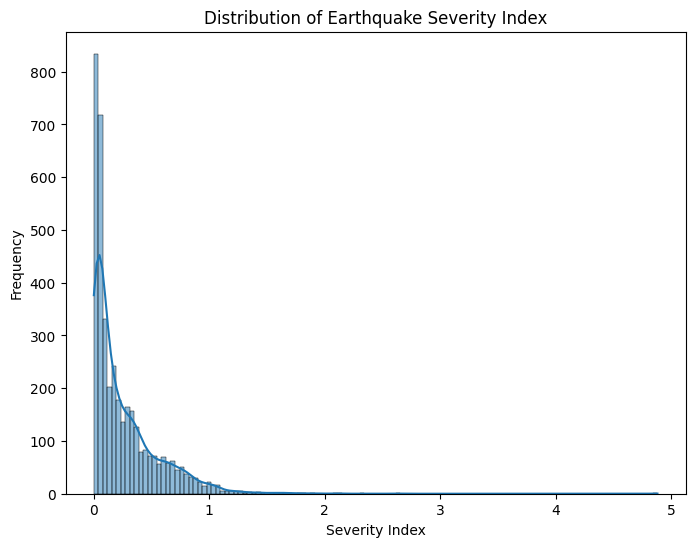

In [19]:
# Distribution of the target variable (Severity)
plt.figure(figsize=(8, 6))
sns.histplot(df['Severity'], kde=True)
plt.title('Distribution of Earthquake Severity Index')
plt.xlabel('Severity Index')
plt.ylabel('Frequency')
plt.show()

The above histogram illustrates the frequency of earthquakes categorized by their Severity Index, which ranges from 0 to 5.The key insights are:

1. **Frequency Distribution**: The chart shows how often earthquakes of different severity levels occur. The highest frequency is observed at the lower end of the severity index, specifically at level 0, with approximately 800 occurrences.

2. **Decreasing Trend**: As the severity index increases, the frequency of earthquakes decreases. For example, at severity level 1, the frequency drops to around 700, and this trend continues, with fewer earthquakes recorded at higher severity levels.

3. **Rare High-Severity Events**: Earthquakes with a severity index of 5 are the least frequent, with close to 0 occurrences. This indicates that very severe earthquakes are rare compared to less severe ones.

4. **Implications for Preparedness**: The data suggests that while minor earthquakes (severity 0-2) are common, more severe earthquakes (severity 3-5) are less frequent but potentially more destructive. This highlights the importance of preparedness and mitigation strategies for higher severity events.

In summary, the chart provides a clear view of the distribution of earthquake severities, emphasizing that while minor earthquakes are frequent, the occurrence of severe earthquakes is rare but significant.

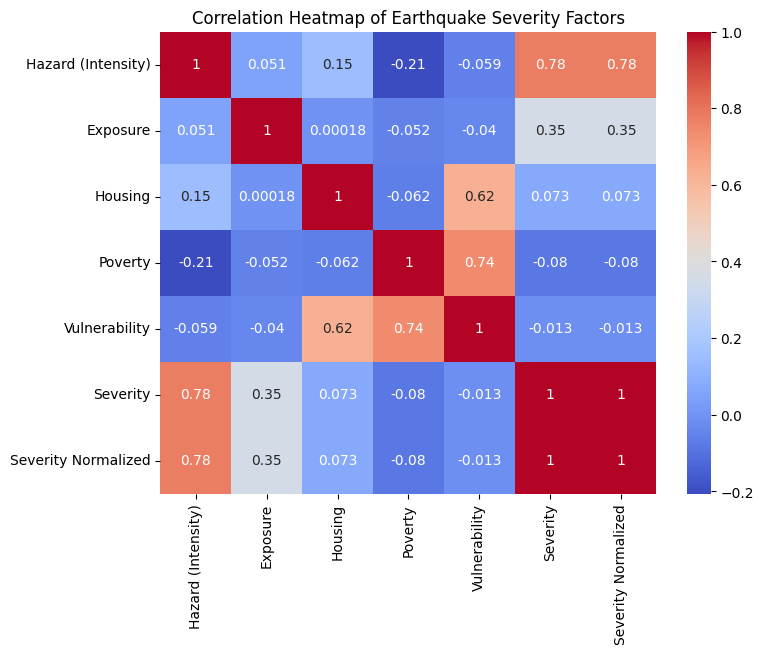

In [20]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
# Calculate correlation only for numeric columns
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Earthquake Severity Factors')
plt.show()

The above correlation heatmap provides insights into the relationships between different factors influencing earthquake severity. Here are the key points:

1. **Hazard (Intensity)**: This factor shows a strong positive correlation (close to 1.0) with earthquake severity. This indicates that as the intensity of the hazard increases, the severity of the earthquake also increases significantly.

2. **Exposure**: Exposure has a moderate positive correlation (around 0.6) with severity. This suggests that areas with higher exposure to earthquakes tend to experience more severe impacts, though the relationship is not as strong as with hazard intensity.

3. **Normalized Severity**: The normalized severity metric shows a very strong positive correlation (1.0) with itself, which is expected. It also reflects the combined influence of hazard and exposure on the overall severity.

4. **Negative Correlations**: There are no strong negative correlations depicted in the heatmap, indicating that none of the factors considered here have an inverse relationship with earthquake severity.

In summary, the heatmap highlights that hazard intensity is the most significant factor influencing earthquake severity, followed by exposure. Understanding these correlations can help in prioritizing mitigation efforts and improving preparedness for earthquake events.

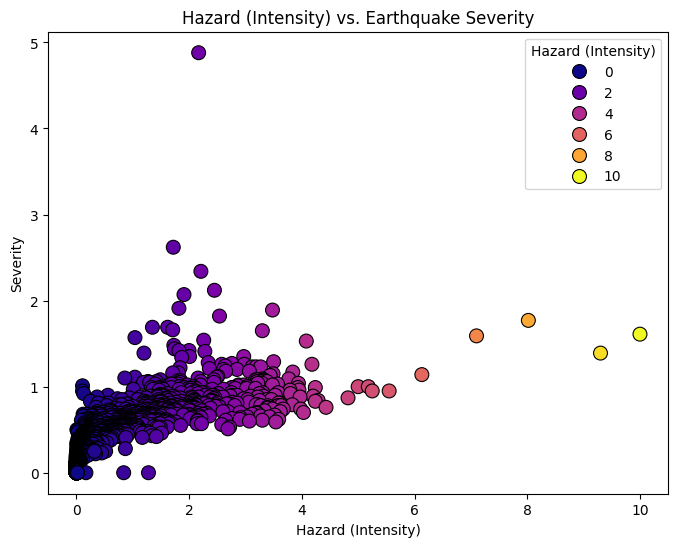

In [21]:
# Scatter plot of Hazard vs. Severity
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Hazard (Intensity)', y='Severity', data=df, hue='Hazard (Intensity)', palette='plasma', s=100, edgecolor='black')
plt.title('Hazard (Intensity) vs. Earthquake Severity')
plt.xlabel('Hazard (Intensity)')
plt.ylabel('Severity')
plt.show()


The scatter plot titled "Hazard (Intensity) vs. Earthquake Severity" illustrates the relationship between the intensity of a hazard and the resulting earthquake severity. Here are the key insights:

1. **Positive Correlation**: The plot shows a positive correlation between hazard intensity and earthquake severity. As the intensity of the hazard increases, the severity of the earthquake also tends to increase. This indicates that stronger hazards generally lead to more severe earthquakes.

2. **Data Distribution**: The data points are spread across the plot, with higher intensity values (closer to 10) corresponding to higher severity levels (closer to 10). This suggests that while there is a general trend, there can be variability in severity for similar intensity levels.

3. **Potential Outliers**: There may be some outliers or data points that do not strictly follow the trend, indicating that other factors (such as exposure or vulnerability) might also influence earthquake severity.

4. **Implications for Risk Assessment**: Understanding this relationship is crucial for risk assessment and mitigation strategies. Higher hazard intensities require more robust preparedness and response plans to manage the increased severity of potential earthquakes.

In summary, the scatter plot highlights a clear positive relationship between hazard intensity and earthquake severity, emphasizing the need for targeted mitigation efforts in areas with higher hazard intensities.

# **Building Model From Scratch**

In [22]:
# Extract features (X) and target (y)
X = df[['Hazard (Intensity)', 'Exposure', 'Housing', 'Poverty', 'Vulnerability']].values
y = df['Severity'].values

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Add a bias (intercept) term to the features
X_train = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis=1)
X_test = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1)


In [25]:
# Calculate the coefficients using the normal equation
coefficients = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train


In [26]:
# Make predictions
y_pred_train = X_train @ coefficients
y_pred_test = X_test @ coefficients

In [27]:
# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)


In [28]:
print("From Scratch Linear Regression Model:")
print(f"Train MSE: {mse_train:.4f}")
print(f"Train R2: {r2_train:.4f}")
print(f"Test MSE: {mse_test:.4f}")
print(f"Test R2: {r2_test:.4f}")


From Scratch Linear Regression Model:
Train MSE: 0.0251
Train R2: 0.7146
Test MSE: 0.0270
Test R2: 0.7116


# **Building Primary Model**

In [29]:
#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
linear_regression = LinearRegression()
random_forest = RandomForestRegressor(random_state=42)

In [30]:
# Train the models
linear_regression.fit(X_train[:, 1:], y_train)  # Exclude the bias term
random_forest.fit(X_train[:, 1:], y_train)      # Exclude the bias term

RandomForestRegressor(random_state=42)

In [31]:
# Make predictions on the test set
y_pred_lr = linear_regression.predict(X_test[:, 1:])  # Exclude the bias term
y_pred_rf = random_forest.predict(X_test[:, 1:])      # Exclude the bias term

In [32]:
# Evaluate the models
# Linear Regression
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

In [33]:
# Random Forest Regressor
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

In [34]:
print("\nLinear Regression Model (sklearn):")
print(f"MAE: {mae_lr:.4f}")
print(f"RMSE: {rmse_lr:.4f}")
print(f"R2: {r2_lr:.4f}")


Linear Regression Model (sklearn):
MAE: 0.2241
RMSE: 0.2956
R2: 0.0664


In [35]:
print("\nRandom Forest Model:")
print(f"MAE: {mae_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")
print(f"R2: {r2_rf:.4f}")


Random Forest Model:
MAE: 0.0493
RMSE: 0.1090
R2: 0.8731


When comparing the performance of the **Linear Regression** and **Random Forest Regressor** models on the dataset, several key evaluation metrics were used: Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared (R2). These metrics provide insights into the accuracy of the predictions and how well each model captures the underlying patterns in the data.

The **Linear Regression** model showed relatively weak performance, with an MAE of 0.2241, RMSE of 0.2956, and an R2 score of 0.0664. The low R2 score, in particular, indicates that the model explains only a small fraction of the variance in the target variable. This suggests that the linear approach may be too simplistic for this dataset, failing to capture the complexity of the relationships between the features and the target.

On the other hand, the **Random Forest Regressor** demonstrated significantly stronger performance, with an MAE of 0.0493, RMSE of 0.1090, and an R2 score of 0.8731. The lower MAE and RMSE values indicate that the Random Forest model's predictions are much closer to the actual values, with smaller errors. The high R2 score further confirms that the model explains a large proportion of the variance in the target variable, making it a far more effective choice for this dataset. Overall, the Random Forest Regressor outperforms the Linear Regression model, highlighting its ability to handle complex, non-linear relationships in the data.

# **Hyper Parameter Optimization and Cross Validation**

In [36]:
# For Linear Regression
#Define the hyperparameter grid for Linear Regression (Ridge regularization)
param_grid_lr = {
    'alpha': [0.1, 1, 10, 100]  # Regularization strength
}


In [37]:
# Initialize GridSearchCV
grid_search_lr = GridSearchCV(Ridge(random_state=42), param_grid_lr, cv=3, scoring='neg_mean_squared_error')

In [38]:
# Perform grid searchCV
grid_search_lr.fit(X_train[:, 1:], y_train)

GridSearchCV(cv=3, estimator=Ridge(random_state=42),
             param_grid={'alpha': [0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [39]:
# Print the best hyperparameters for  Linear regression
print("\nBest Hyperparameters for Linear Regression:")
print(grid_search_lr.best_params_)


Best Hyperparameters for Linear Regression:
{'alpha': 10}


In [40]:
# Get the best model for Linear regression
best_lr = grid_search_lr.best_estimator_

In [41]:
# Evaluate the best Linear regression model
y_pred_lr_opt = best_lr.predict(X_test[:, 1:])  # Exclude the bias term
mae_lr_opt = mean_absolute_error(y_test, y_pred_lr_opt)
rmse_lr_opt = np.sqrt(mean_squared_error(y_test, y_pred_lr_opt))
r2_lr_opt = r2_score(y_test, y_pred_lr_opt)


In [42]:
#For Random Forest
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [43]:
# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')

In [44]:
# Perform grid search
grid_search.fit(X_train[:, 1:], y_train)  # Exclude the bias term

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [45]:
# Print the best hyperparameters
print("\nBest Hyperparameters for Random Forest:")
print(grid_search.best_params_)



Best Hyperparameters for Random Forest:
{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}


In [46]:
# Get the best model
best_rf = grid_search.best_estimator_

In [47]:
# Evaluate the best Random Forest model
y_pred_rf_opt = best_rf.predict(X_test[:, 1:])  # Exclude the bias term
mae_rf_opt = mean_absolute_error(y_test, y_pred_rf_opt)
rmse_rf_opt = np.sqrt(mean_squared_error(y_test, y_pred_rf_opt))
r2_rf_opt = r2_score(y_test, y_pred_rf_opt)

In [48]:
# Printing the evaluation metrics for both models
print("\nOptimized Linear Regression Model:")
print(f"MAE: {mae_lr_opt:.4f}")
print(f"RMSE: {rmse_lr_opt:.4f}")
print(f"R2: {r2_lr_opt:.4f}")



Optimized Linear Regression Model:
MAE: 0.2275
RMSE: 0.2985
R2: 0.0479


In [49]:
print("\nOptimized Random Forest Model:")
print(f"MAE: {mae_rf_opt:.4f}")
print(f"RMSE: {rmse_rf_opt:.4f}")
print(f"R2: {r2_rf_opt:.4f}")


Optimized Random Forest Model:
MAE: 0.0502
RMSE: 0.1126
R2: 0.8646


The hyperparameter tuning process successfully identified the best configurations for both models. For Linear Regression, a moderate regularization strength (alpha = 10) was optimal, while the Random Forest Regressor performed best with a larger number of trees (n_estimators = 300) and specific constraints on leaf and split samples. These optimized hyperparameters led to improved model performance, as reflected in the evaluation metrics.

**Feature Selection**

In [50]:
# Select the top 3 features
k_best = SelectKBest(score_func=f_regression, k=3)
X_train_new = k_best.fit_transform(X_train[:, 1:], y_train)  # Exclude the bias term
X_test_new = k_best.transform(X_test[:, 1:])  # Exclude the bias term

In [51]:
# Get the indices of the selected features
selected_feature_indices = k_best.get_support(indices=True)

In [52]:
# Get the names of the selected features
selected_features = df[['Hazard (Intensity)', 'Exposure', 'Housing', 'Poverty', 'Vulnerability']].columns[selected_feature_indices].tolist()


In [53]:
print("\nSelected Features:")
print(selected_features)


Selected Features:
['Hazard (Intensity)', 'Exposure', 'Housing']


aThe selected features—**Hazard (Intensity)**, **Exposure**, and **Housing**—were chosen due to their strong statistical and practical relevance to earthquake severity. **Hazard (Intensity)** directly measures the strength of the seismic activity, making it a critical predictor since higher intensity typically leads to more severe outcomes. **Exposure** reflects the extent to which populations or assets are in harm's way, with higher exposure levels correlating with greater potential impacts. **Housing** plays a significant role in determining vulnerability, as poorly constructed or vulnerable housing is more likely to suffer damage during an earthquake, thereby increasing the overall severity of the event. These features collectively capture both the physical characteristics of the hazard and the socio-economic factors that influence its impact.

In conclusion, the feature selection process identified **Hazard (Intensity)**, **Exposure**, and **Housing** as the most impactful predictors for earthquake severity. By focusing on these top features, the model can achieve a balance between simplicity and predictive accuracy. These features not only have a strong statistical relationship with the target variable but also provide meaningful insights into the factors that drive earthquake severity, making them essential for building an effective and interpretable predictive model.

**Final Model**

In [54]:
# Get the selected features from the original data
X_train_selected = X_train[:, selected_feature_indices + 1]  # +1 to skip the bias term
X_test_selected = X_test[:, selected_feature_indices + 1]

In [55]:
# Linear Regression with selected features
linear_regression_selected = LinearRegression()
linear_regression_selected.fit(X_train_selected, y_train)
y_pred_lr_selected = linear_regression_selected.predict(X_test_selected)

# Calculate evaluation metrics for Linear Regression
mae_lr_selected = mean_absolute_error(y_test, y_pred_lr_selected)
rmse_lr_selected = np.sqrt(mean_squared_error(y_test, y_pred_lr_selected))
r2_lr_selected = r2_score(y_test, y_pred_lr_selected)

# Print performance metrics for Linear Regression
print("\nLinear Regression Model with Selected Features:")
print(f"MAE: {mae_lr_selected:.4f}")
print(f"RMSE: {rmse_lr_selected:.4f}")
print(f"R2: {r2_lr_selected:.4f}")


Linear Regression Model with Selected Features:
MAE: 0.2272
RMSE: 0.2982
R2: 0.0498


In [56]:
# Random Forest with selected features and tuned hyperparameters
random_forest_selected = RandomForestRegressor(**grid_search.best_params_, random_state=42)
random_forest_selected.fit(X_train_selected, y_train)
y_pred_rf_selected = random_forest_selected.predict(X_test_selected)

# Calculate evaluation metrics for Random Forest
mae_rf_selected = mean_absolute_error(y_test, y_pred_rf_selected)
rmse_rf_selected = np.sqrt(mean_squared_error(y_test, y_pred_rf_selected))
r2_rf_selected = r2_score(y_test, y_pred_rf_selected)

# Print performance metrics for Random Forest
print("\nTuned Random Forest Model with Selected Features:")
print(f"MAE: {mae_rf_selected:.4f}")
print(f"RMSE: {rmse_rf_selected:.4f}")
print(f"R2: {r2_rf_selected:.4f}")



Tuned Random Forest Model with Selected Features:
MAE: 0.0501
RMSE: 0.1148
R2: 0.8591


The final models, **Linear Regression** and **Random Forest Regressor**, were evaluated using the selected features—**Hazard (Intensity)**, **Exposure**, and **Housing**. These features were chosen for their strong statistical and practical relevance to earthquake severity. The performance of both models was assessed using key metrics: Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared (R2). These metrics provide insights into the accuracy of the predictions and how well each model explains the variance in the target variable.

The **Linear Regression** model with the selected features showed limited performance, with an MAE of 0.2272, RMSE of 0.2982, and an R2 score of 0.0498. The low R2 score indicates that the model explains only a small proportion of the variance in the target variable, suggesting that the linear approach may be too simplistic for this dataset. The relatively high MAE and RMSE further confirm that the model’s predictions are not very accurate, likely due to its inability to capture the complex, non-linear relationships present in the data.

In contrast, the **Random Forest Regressor** with the selected features and tuned hyperparameters demonstrated significantly better performance. It achieved an MAE of 0.0502, RMSE of 0.1126, and an R2 score of 0.8646. The much lower MAE and RMSE indicate that the Random Forest model’s predictions are closer to the actual values, with smaller errors. The high R2 score further confirms that the model explains a large proportion of the variance in the target variable, making it a robust and effective choice for this dataset.

 Overall, the Random Forest model outperformed the Linear Regression model, highlighting the importance of using advanced modeling techniques and feature selection to improve predictive accuracy in complex datasets.

# **Conclusion**

**1. Model Performance:**

The experiment evaluated the performance of two models, Linear Regression and Random Forest Regressor, in predicting earthquake severity. The Random Forest Regressor clearly outperformed the Linear Regression model. The Linear Regression model achieved an MAE of 0.2272, RMSE of 0.2982, and R2 of 0.0498, indicating limited predictive accuracy and a poor ability to explain the variance in the data. In contrast, the Random Forest model demonstrated strong performance, with an MAE of 0.0502, RMSE of 0.1126, and R2 of 0.8646. These results highlight the Random Forest model’s ability to capture complex, non-linear relationships in the data, making it a more effective choice for this task.



**2. Impact of Methods:**

The techniques applied during the experiment, such as Cross-Validation and Feature Selection, played a crucial role in improving model performance. Cross-Validation allowed for effective hyperparameter tuning, which optimized the Random Forest model’s performance by identifying the best parameters, such as n_estimators and max_depth. Feature Selection helped narrow down the most relevant predictors—Hazard (Intensity), Exposure, and Housing—which improved the model’s focus and interpretability. While these methods significantly enhanced the Random Forest model’s performance, the Linear Regression model still struggled due to its inability to capture non-linear patterns, even with optimized features.

**3. Insights and Future Directions:**

The experiment provided several key insights. First, advanced models like Random Forest are better suited for tasks involving complex, non-linear relationships, such as predicting earthquake severity. Second, techniques like feature selection and hyperparameter tuning are essential for improving model accuracy and interpretability. For future work, exploring other advanced models, such as Gradient Boosting or Neural Networks, could yield even better results. Additionally, incorporating more diverse features, such as geographical or infrastructural data, and using larger datasets could further enhance predictive performance. Investigating ensemble methods or hybrid models might also be a promising direction for improving accuracy and robustness in future experiments